In [3]:
import glob
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dirs = glob.glob(r'C:\Users\rampaln\OneDrive - NIWA\Research Projects\Climate_Indices\CPP_indices\notebooks\Downloads\data\*.nc')
from scipy.stats import linregress
# df = xr.open_mfdataset(list(dirs)[850:], parallel = True, combine = 'by_coords')

## Directories with ersst anomalies

In [86]:
x = []
dates = []
for file in list(dirs)[:]:
    df = xr.open_dataset(file).sel(lev =0.0, lat = slice(-40,22), lon = slice(190,253))['ssta']
    # subsetting the anomalies
    x.append(df.values)
    dates.append(file.split('\\')[-1].split('.')[2])
    # SAVING THE time metadata from the file itself. 

z1 = np.array(x)[:,0]
z1.shape


### Saving the time metadata in a separate file
dates1 =pd.to_datetime(dates, format = '%Y%m')
index_frame = pd.DataFrame(index =dates1)

index_frame['data'] = np.arange(len(index_frame))
index_frame

,data
1854-01-01,0
1854-02-01,1
1854-03-01,2
1854-04-01,3
1854-05-01,4
...,...
2019-12-01,1991
2020-01-01,1992
2020-02-01,1993
2020-03-01,1994


## Quick Visualisation of the Fields
1. Taking a random instance in time.

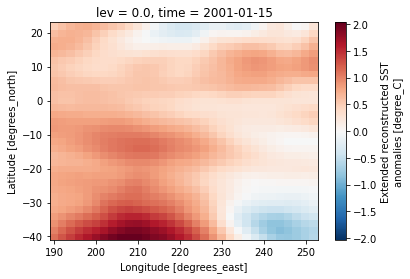

In [5]:
# plt.figure()
# plt.imshow(x[24][0], cmap='RdBu', vmin =-2, vmax =2)
# plt.colorbar()
df.isel(time =0).plot()

In [6]:
series = pd.read_excel(r"C:\Users\rampaln\OneDrive - NIWA\Research Projects\Temperature Anomalies\Copy of NZT7_Adjusted_TMean_Anomalies2020_updated.xlsx")

In [549]:
import tensorflow.keras.layers as L

In [600]:
def Colorize():
    embed_input = L.Input(shape=(1000,))
    
    #Encoder
    encoder_input = L.Input(shape=(16, 16, 1,))
    encoder_output = L.Conv2D(128, (3,3), activation='relu', padding='same',strides=1)(encoder_input)
    encoder_output = L.MaxPooling2D((2, 2), padding='same')(encoder_output)
    encoder_output = L.Conv2D(128, (4,4), activation='relu', padding='same')(encoder_output)
    encoder_output = L.Conv2D(128, (3,3), activation='relu', padding='same',strides=1)(encoder_output)
    encoder_output = L.MaxPooling2D((2, 2), padding='same')(encoder_output)
    encoder_output = L.Conv2D(256, (4,4), activation='relu', padding='same')(encoder_output)
    encoder_output = L.Conv2D(256, (3,3), activation='relu', padding='same',strides=1)(encoder_output)
    encoder_output = L.MaxPooling2D((2, 2), padding='same')(encoder_output)
    encoder_output = L.Conv2D(256, (4,4), activation='relu', padding='same')(encoder_output)
    encoder_output = L.Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
    encoder_output = L.Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
    output = L.GlobalAveragePooling2D()(encoder_output)
    encoded = L.Dense(1, activation ='linear')(output)
    decoded = L.Dense(2*2*16)(encoded)
    encoder_ = L.Reshape((2,2,16))(decoded)

    #Fusion
    #fusion_output = RepeatVector(32 * 32)(embed_input) 
    # fusion_output = Reshape(([32, 32, 1000]))(fusion_output)
    #fusion_output = concatenate([encoder_output, fusion_output], axis=3) 
    fusion_output = L.Conv2D(256, (1, 1), activation='relu', padding='same')(encoder_)
    
    #Decoder
    decoder_output = L.Conv2D(128, (3,3), activation='relu', padding='same')(fusion_output)
    decoder_output = L.Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
    decoder_output = L.UpSampling2D((2, 2))(decoder_output)
    decoder_output = L.Conv2D(128, (3,3), activation='relu', padding='same')(decoder_output)
    decoder_output = L.UpSampling2D((2, 2))(decoder_output)
    decoder_output = L.Conv2D(64, (4,4), activation='relu', padding='same')(decoder_output)
    decoder_output = L.Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
    decoder_output = L.Conv2D(32, (2,2), activation='relu', padding='same')(decoder_output)
    decoder_output = L.Conv2D(1, (3, 3), activation='tanh', padding='same')(decoder_output)
    decoder_output = L.UpSampling2D((2, 2))(decoder_output)
    return tf.keras.models.Model(inputs=encoder_input, outputs=decoder_output)

model = Colorize()
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_157 (InputLayer)       [(None, 16, 16, 1)]       0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 16, 16, 128)       1280      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 8, 8, 128)         262272    
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 4, 4, 256)         524

In [602]:
#
#model.compile(loss='mse',optimizer ='adam')
#model.summary()
model.fit(x_train[:,:,:,0:1], x_train[:,:,:,0:1],validation_data=(x_test[:,:,:,0:1],x_test[:,:,:,0:1]), epochs =10, batch_size =20)

Train on 889 samples, validate on 445 samples
Epoch 1/10
889/889 [==============================] - 21s 23ms/sample - loss: 0.2409 - val_loss: 0.2937
Epoch 2/10
889/889 [==============================] - 22s 25ms/sample - loss: 0.2412 - val_loss: 0.2905
Epoch 3/10
889/889 [==============================] - 21s 23ms/sample - loss: 0.2490 - val_loss: 0.2704
Epoch 4/10
889/889 [==============================] - 22s 24ms/sample - loss: 0.2446 - val_loss: 0.3255
Epoch 5/10
889/889 [==============================] - 22s 25ms/sample - loss: 0.2588 - val_loss: 0.3470
Epoch 6/10
889/889 [==============================] - 21s 24ms/sample - loss: 0.2471 - val_loss: 0.3387
Epoch 7/10
889/889 [==============================] - 22s 25ms/sample - loss: 0.2455 - val_loss: 0.3421
Epoch 8/10
889/889 [==============================] - 23s 26ms/sample - loss: 0.2386 - val_loss: 0.3202
Epoch 9/10
889/889 [==============================] - 21s 23ms/sample - loss: 0.2378 - val_loss: 0.3288
Epoch 10/10
889/88

In [607]:
input = L.Input((16,16,1))
x = input
for layer in model.layers[:14]:
    x=layer(x)
model2 = tf.keras.models.Model(input, x)    


In [615]:
!pip install jaydebeapi


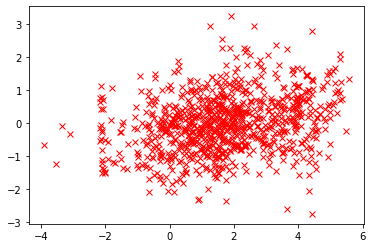

In [614]:
z2 = model2.predict(x_train[:,:,:,0:1])
z2.shape
# z2.shape
plt.plot(y_train.ravel(), 'rx')
#plt.plot(z2[:,0])
# # plt.figure()
# # plt.imshow(z2[4,:,:,0], vmin =-2, vmax =2, interpolation = None)
# # plt.colorbar()
# # plt.figure()
# # plt.imshow(x_test[4,:,:,0], vmin =-2, vmax =2)
# # plt.colorbar()
# plt.plot(z2)
#plt.plot(x_test[:,12,12,0])

## Loading the NZ 7 series temperature anomalies 

In [7]:
series = series.iloc[:-1]
cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec']
nums = np.arange(0,12)
d = dict()
for i in range(len(cols)):
    d[cols[i]] = nums[i]
time_series = pd.melt(series[['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
    'Oct', 'Nov', 'Dec']], id_vars =['Year'])
output =time_series['variable'].apply(lambda a: d[a])
time_series['output'] = output
time_series['datetime'] = time_series[['Year','output']].T.apply(lambda a:pd.to_datetime(f"{int(a[0])}-{int(a[1]+1)}-01") )
series = time_series.set_index(['datetime'], drop= True).sort_index()['value']

## Loading SOI index

In [8]:
df1 = pd.read_csv(r'https://www.ncdc.noaa.gov/teleconnections/enso/indicators/soi/data.csv',skiprows=[0,1],header=None)
df1.index = df1[0].apply(lambda a: pd.to_datetime(a, format = "%Y%m"))#.

## Correlations with a 3-month Lag with the SOI

Strongest correlations with the SOI a couple months delayed (approximately 5 months delayed)

Correlation over 5 month rolling window 0.30370898760046233
Correlation over a 1 month rolling window 0.19055469556142732


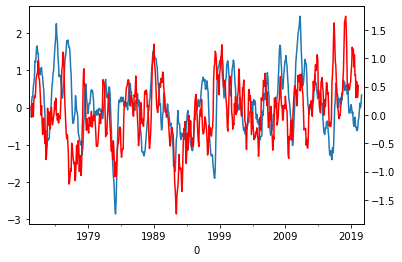

In [9]:
fig,ax = plt.subplots()
df1[1].loc["1970":].rolling(window =5).mean().plot(ax = ax)
ax2 = ax.twinx()
series.loc["1970":].rolling(window =5).mean().plot(ax = ax2, color='r')
print("Correlation over 5 month rolling window",series.loc["1970":].rolling(window =5).mean().corr(df1[1].loc["1970":].rolling(window =5).mean().shift(0)))
print("Correlation over a 1 month rolling window",series.loc["1970":].rolling(window =1).mean().corr(df1[1].loc["1970":].rolling(window =1).mean().shift(-1)))

In [164]:
import cv2
idx = series.dropna().index.intersection(index_frame.index)[:]
idx_samples = index_frame.loc[idx.shift(0)] ## Shifting the SST anomalies three months back
X = np.array([z1[idx_samples.values]])[0]
X1 = []
i_lags = 12
for i in range(i_lags, X.shape[0]):
    #print(i)
    z2_= cv2.resize(X[i-12:i].transpose(1,2,3,0)[0], (16,16)).transpose(2,0,1)
    X1.append(z2_)
X1 = np.array(X1)
#X1 = 255 * X1/X1.max()
#X1 =X1[:,:,:,:,np.newaxis]
y = series.dropna().loc[idx][15:]
y = (y-y.min())/(y.max()-y.min())
#for i in range(lags):
y.min()


0.0

In [169]:
x_train,x_test, y_train,y_test =X1[0:2*len(X1)//3],X1[2*len(X1)//3:], y[0:2*len(X1)//3], y[2*len(X1)//3:]
x_train.shape

(881, 12, 16, 16)

## Test Example with Three month  Lag in SST anomalies

1. It appears that results worsen significantly with lagged correlations. 

In [189]:
import tensorflow as tf
i1 = tf.keras.layers.Input([12,16, 16], dtype = tf.float32)
i2 = tf.keras.layers.Reshape((12,16,16,1))(i1)
x = tf.keras.layers.BatchNormalization()(i2)
x = tf.keras.layers.Conv3D(filters = 8, kernel_size =(3,3,3), padding = 'same')(x)
x = tf.keras.layers.MaxPool3D((2,2,2))(x)
x = tf.keras.layers.Conv3D(filters = 8, kernel_size =(3,3,3), padding = 'same')(x)
x = tf.keras.layers.Conv3D(filters = 8, kernel_size =(3,3,3), strides =1, padding = 'same')(x)
input2 = tf.keras.layers.MaxPool3D((2,2,2))(x)
x = tf.keras.layers.Conv3D(filters = 8, kernel_size =(3,3,3), strides =1, padding = 'same')(input2)
x1 = tf.keras.layers.MaxPool3D((1,2,2))(x)
x1 = tf.keras.layers.BatchNormalization()(x1)

# #x1 = tf.keras.layers.ConvLSTM2D(16, kernel_size=(12,1), padding ='same', strides =(3,1), return_sequences=True)(x1)

# #x1 = tf.keras.layers.MaxPool3D((2,2,1))(x1)
# #1 = tf.keras.layers.ConvLSTM2D(16, kernel_size=(12,1), padding ='same', strides =(3,1), return_sequences=False)(x1)
# #x1 = tf.keras.layers.MaxPool2D((2,1))(x1)
x1 = tf.keras.layers.Flatten()(x1)
x1 = tf.keras.layers.Dense(32, activation ='linear', kernel_regularizer = tf.keras.regularizers.l2(15))(x1)
x1 = tf.keras.layers.BatchNormalization()(x1)
output = tf.keras.layers.Dense(1, activation = 'linear')(x1)
model = tf.keras.Model(inputs=[i1], outputs=[output])
model.summary()


Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        [(None, 12, 16, 16)]      0         
_________________________________________________________________
reshape_76 (Reshape)         (None, 12, 16, 16, 1)     0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 12, 16, 16, 1)     4         
_________________________________________________________________
conv3d_42 (Conv3D)           (None, 12, 16, 16, 8)     224       
_________________________________________________________________
max_pooling3d_39 (MaxPooling (None, 6, 8, 8, 8)        0         
_________________________________________________________________
conv3d_43 (Conv3D)           (None, 6, 8, 8, 8)        1736      
_________________________________________________________________
conv3d_44 (Conv3D)           (None, 6, 8, 8, 8)        173

In [181]:
input2

<tf.Tensor 'max_pooling3d_29/Identity:0' shape=(None, 1, 1, 1, 8) dtype=float32>

In [161]:
import tensorflow as tf
i1 = tf.keras.layers.Input([12,16, 16,3], dtype = tf.float32)
#i2 = tf.keras.layers.Reshape((12,16,16,3))(i1)
#x = tf.keras.layers.BatchNormalization()(i)
#x = tf.keras.layers.Conv2D(filters = 3, kernel_size =(3,3))(i)
i = tf.cast(i1, tf.float32)
x = tf.keras.applications.resnet.preprocess_input(i)
core = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    pooling=True,
    classes=1
)
core.trainable = False
x = tf.keras.layers.TimeDistributed(core)(x)
x1 = tf.keras.layers.Reshape((12, 2048))(x)
x1 = tf.keras.layers.Conv1D(filters = 128, kernel_size = 4, padding = 'same')(x1)

x1 = tf.keras.layers.MaxPool1D(2)(x1)
x1 = tf.keras.layers.Conv1D(filters = 64, kernel_size = 4, padding = 'same')(x1)

x1 = tf.keras.layers.MaxPool1D(2)(x1)
x1 = tf.keras.layers.BatchNormalization()(x1)

# #x1 = tf.keras.layers.ConvLSTM2D(16, kernel_size=(12,1), padding ='same', strides =(3,1), return_sequences=True)(x1)

# #x1 = tf.keras.layers.MaxPool3D((2,2,1))(x1)
# #1 = tf.keras.layers.ConvLSTM2D(16, kernel_size=(12,1), padding ='same', strides =(3,1), return_sequences=False)(x1)
# #x1 = tf.keras.layers.MaxPool2D((2,1))(x1)
x1 = tf.keras.layers.Flatten()(x1)
x1 = tf.keras.layers.Dense(64, activation ='linear')(x1)
x1 = tf.keras.layers.BatchNormalization()(x1)
output = tf.keras.layers.Dense(1, activation = 'linear')(x1)
model = tf.keras.Model(inputs=[i1], outputs=[output])
model.summary()


Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 12, 16, 16, 3)]   0         
_________________________________________________________________
tf_op_layer_strided_slice_13 [(None, 12, 16, 16, 3)]   0         
_________________________________________________________________
tf_op_layer_add_11 (TensorFl [(None, 12, 16, 16, 3)]   0         
_________________________________________________________________
time_distributed_10 (TimeDis (None, 12, 1, 1, 2048)    23587712  
_________________________________________________________________
reshape_61 (Reshape)         (None, 12, 2048)          0         
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 12, 128)           1048704   
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 6, 128)            0  

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        [(None, 12, 16, 16)]      0         
_________________________________________________________________
reshape_76 (Reshape)         (None, 12, 16, 16, 1)     0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 12, 16, 16, 1)     4         
_________________________________________________________________
conv3d_42 (Conv3D)           (None, 12, 16, 16, 8)     224       
_________________________________________________________________
max_pooling3d_39 (MaxPooling (None, 6, 8, 8, 8)        0         
_________________________________________________________________
conv3d_43 (Conv3D)           (None, 6, 8, 8, 8)        1736      
_________________________________________________________________
conv3d_44 (Conv3D)           (None, 6, 8, 8, 8)        173

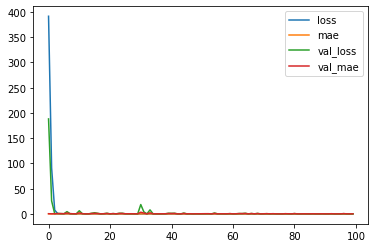

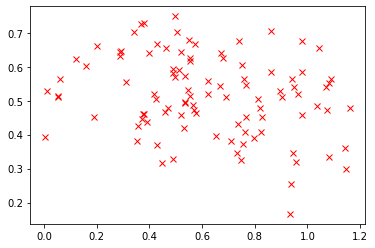

In [190]:
# import tensorflow as tf
# x = tf.keras.layers.Input([16, 16, 3], dtype = tf.float32)
# #x = tf.keras.layers.BatchNormalization()(i)
# #x = tf.keras.layers.Conv2D(filters = 3, kernel_size =(3,3))(i)
# i = tf.cast(x, tf.float32)
# x = tf.keras.applications.resnet.preprocess_input(i)
# core = tf.keras.applications.ResNet50(
#     include_top=False,
#     weights="imagenet",
#     pooling=True,
#     classes=1
# )
# core.trainable = False
# x = core(x)


# #x = tf.keras.layers.GlobalAveragePooling2D()(x)
# #x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Dense(64, activation = 'relu')(x)
# #x = tf.keras.layers.Dropout(0.1)(x)
# #x = tf.keras.layers.BatchNormalization()(x)
# #x = tf.keras.layers.Dense(16, activation = 'linear')(x)
# #x = tf.keras.layers.BatchNormalization()(x)
# # x = tf.keras.layers.Dense(16, activation = 'linear')(x)
# x = tf.keras.layers.Dense(1, activation='linear')(x)
# model = tf.keras.Model(inputs=[i], outputs=[x])
# # # for layer in model.layers[3:len(model.layers)-3]:
# #     layer.trainable = False
# import tensorflow as tf
# # def custom_loss(y_true, y_pred):
#     abs_value = y_true - y_pred
#     return K.mean(K.square(abs_value))
model.compile(loss='mse', optimizer ='rmsprop', metrics = ['mae'])#,metrics = METRICS)
model.summary(

)
import pandas as pd
history = model.fit(x_train,y_train, epochs =100, validation_data = (x_test[0:100], y_test[0:100]), batch_size =12, shuffle=True)
df = pd.DataFrame(history.history)
df.plot()
z=model.predict(x_test[:100,:,:,:])
plt.figure()
plt.plot(np.convolve(z[:].ravel(), np.ones(1)), np.convolve(y_test[:100].ravel(), np.ones(1)), 'rx')


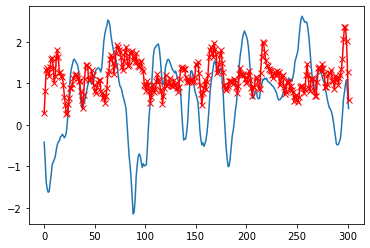

In [195]:
# df = pd.DataFrame(history.history)
# df.plot()
z=model.predict(x_train[:300,:,:,:])
plt.figure()
plt.plot(np.convolve(z[:].ravel(), np.ones(3)))
plt.plot(np.convolve(y_train[:300].ravel(), np.ones(3)), 'rx-')

In [399]:
np.unique(np.argmax(z,axis=-1))

array([ 9, 13, 22, 30], dtype=int64)

## There appears to be an inability to produce negative outcomes with the anomalies ?

In [259]:
import tensorflow as tf
import keras
# keras = tf.keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape
from tensorflow.keras.models import Model

input_img = keras.layers.Input(shape=(16, 16, 1)) 
x1 =keras.layers.BatchNormalization()(input_img) 
x = keras.layers.Conv2D(filters = 128, kernel_size = (5,5), activation='relu', padding='same')(x1)
x = keras.layers.Conv2D(filters = 64, kernel_size = (5,5), activation='relu', padding='same')(x)
#x = keras.layers.Concatenate(-1)([x,x1])


# Conv2 #
# x = keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding='same')(x)

x = keras.layers.MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = keras.layers.Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)

x = keras.layers.MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = keras.layers.Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = keras.layers.Conv2D(filters = 4, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(encoded)
# x = keras.layers.Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
# x = keras.layers.BatchNormalization()(x)
# encoded = keras.layers.MaxPooling2D(pool_size = (2, 2), padding='same')(x)
# ############


# x = keras.layers.Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(encoded)
# x = keras.layers.Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
#x = keras.layers.BatchNormalization()(x)
# encoded = keras.layers.MaxPooling2D(pool_size = (2, 2), padding='same')(x)


#model = keras.models.Model(input_img, encoded)
#input2 = keras.layers.Input(shape=(5,32,32,1))
#distributed = keras.layers.TimeDistributed(model)(input2)


flatten = keras.layers.Flatten()(x)

output = keras.layers.Dense(64, activation = 'relu')(flatten)
output = keras.layers.Dropout(0.5)(output)
decoded = keras.layers.Dense(1, activation ='linear')(output)#, kernel_initializer = 'zeros'

#decpded
# Declare the model
model = keras.models.Model(input_img,decoded)
model.output_shape
model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 16, 16, 1)         0         
_________________________________________________________________
batch_normalization_72 (Batc (None, 16, 16, 1)         4         
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 16, 16, 128)       3328      
_________________________________________________________________
conv2d_178 (Conv2D)          (None, 16, 16, 64)        204864    
_________________________________________________________________
batch_normalization_73 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_179 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 16, 16, 32)        184

In [193]:
#model.save('best_nz_model2_months_prior_predicion.h5')

In [253]:
model= keras.models.load_model('best_nz_model2_months_prior_predicion.h5')

In [254]:
for layer in model.layers[:-10]:
   layer.trainable = False

In [260]:
model.compile(loss ='mse', optimizer ='adam')
model.summary()

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 16, 16, 1)         0         
_________________________________________________________________
batch_normalization_72 (Batc (None, 16, 16, 1)         4         
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 16, 16, 128)       3328      
_________________________________________________________________
conv2d_178 (Conv2D)          (None, 16, 16, 64)        204864    
_________________________________________________________________
batch_normalization_73 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_179 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 16, 16, 32)        184

In [155]:
time = y.index[2*len(y)//3:]

- 14s 15ms/step - loss: 0.0997 - val_loss: 1.2086
Epoch 111/300
888/888 [==============================] - 14s 16ms/step - loss: 0.1014 - val_loss: 1.3067
Epoch 112/300
888/888 [==============================] - 14s 15ms/step - loss: 0.1133 - val_loss: 1.1574
Epoch 113/300
888/888 [==============================] - 14s 15ms/step - loss: 0.1043 - val_loss: 1.4013
Epoch 114/300
888/888 [==============================] - 14s 15ms/step - loss: 0.1087 - val_loss: 1.3115
Epoch 115/300
888/888 [==============================] - 14s 15ms/step - loss: 0.0937 - val_loss: 1.1909
Epoch 116/300
888/888 [==============================] - 14s 15ms/step - loss: 0.0913 - val_loss: 1.3016
Epoch 117/300
888/888 [==============================] - 14s 15ms/step - loss: 0.1102 - val_loss: 1.2843
Epoch 118/300
888/888 [==============================] - 14s 15ms/step - loss: 0.0965 - val_loss: 1.1711
Epoch 119/300
888/888 [==============================] - 14s 16ms/step - loss: 0.0990 - val_loss: 1.1420
Epoch

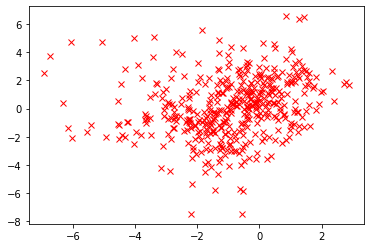

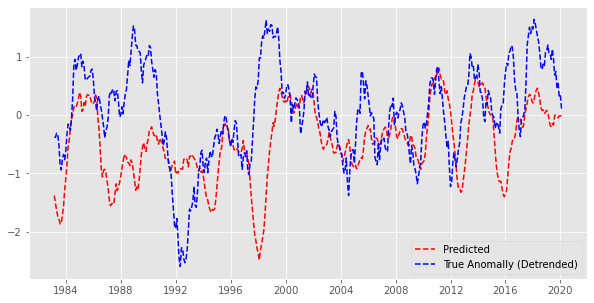

In [261]:
model.fit(x_train[:,:,:,0:1],y_train.values, epochs =300, validation_data = (x_test[:200,:,:,0:1], y_test.values[0:200]), batch_size =30)
z=model.predict(x_test[:,:,:,0:1])
plt.plot(np.convolve(z[:].ravel(), np.ones(4)), np.convolve(y_test[:].values.ravel(), np.ones(4)), 'rx')
with plt.style.context('ggplot'):
    plt.figure(figsize =(10,5))
    plt.plot_date(time, np.convolve(z.ravel(), np.ones(12)/6, mode='same'), 'r--', label ='Predicted')
    plt.plot(time, np.convolve(y_test.ravel(), np.ones(12)/6, mode='same'),'b--', label ='True Anomally (Detrended)')
    plt.legend()
# #plt.plot(y_test[0:100
